### This analysis is based on a course on Pandas I took on dataquest.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
import math

### Splitting in pandas is performed using the .groupby() method of a Series or DataFrame object, which given one or more index labels and/or column names, will divide the data based on the values present in the specified index labels and columns.


Once the data is split into groups, one or more of the following three broad classes of operations is applied:

- Aggregation: This calculates a summary statistic, such as group means or counts of the items in each group
    
- Transformation: This performs group- or item-specific calculations and returns a set of like-indexed results
    
- Filtration: This removes entire groups of data based on a group level computation

In [3]:
dfhap = pd.read_csv("../files/2015happiness.csv")

In [4]:
dfhap.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In pandas, it is possible to group by any single categorical variable by passing its name to .groupby().

In [5]:
groupreg = dfhap.groupby('Region')

In [6]:
groupreg

In [7]:
### This tells us how many unique groups it will create.
groupreg.ngroups

10

In [8]:
### This is the same as.
dfhap["Region"].nunique()

10

The .groups property will return a Python dictionary whose keys represent the names of each group (if multiple columns are specified, it is a tuple). The values in the dictionary are an array of the index labels contained within each respective group:

In [9]:
groupreg.groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [10]:
for name,group in groupreg:
    print(name)
    print(group)

Australia and New Zealand
       Country                     Region  Happiness Rank  Happiness Score  \
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
8     0.47501            2.26425  
9     0.43562            2.26646  
Central and Eastern Europe
                    Country                      Region  Happiness Rank  \
30           Czech Republic  Central and Eastern Europe              31   
43               Uzbekistan  Central and Eastern Europe              44   

In [11]:
### This will show the size of the individual group.
groupreg.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [12]:
### This will return the count for the individual features in the group.
groupreg.count()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,2,2,2,2,2,2,2,2,2,2,2
Central and Eastern Europe,29,29,29,29,29,29,29,29,29,29,29
Eastern Asia,6,6,6,6,6,6,6,6,6,6,6
Latin America and Caribbean,22,22,22,22,22,22,22,22,22,22,22
Middle East and Northern Africa,20,20,20,20,20,20,20,20,20,20,20
North America,2,2,2,2,2,2,2,2,2,2,2
Southeastern Asia,9,9,9,9,9,9,9,9,9,9,9
Southern Asia,7,7,7,7,7,7,7,7,7,7,7
Sub-Saharan Africa,40,40,40,40,40,40,40,40,40,40,40


In [13]:
### Accesing individual group
groupreg.get_group("Eastern Asia")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
99,Mongolia,Eastern Asia,100,4.874,0.03313,0.82819,1.30060,0.60268,0.43626,0.02666,0.33230,1.34759


#### Now we can plot the happiness score of this group but before that we need to replace the index with the country column

In [14]:
east_asia = groupreg.get_group("Eastern Asia").set_index("Country")

Text(0.5, 1.0, 'Happiness Score of countries in East Asia')

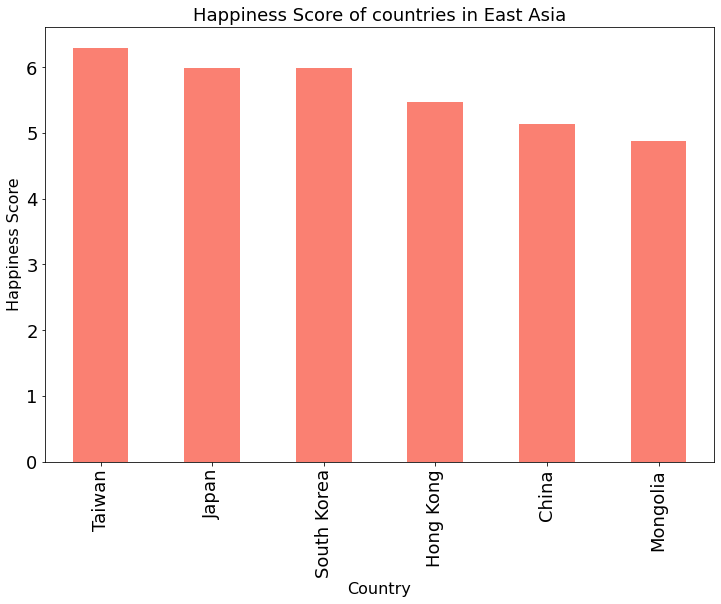

In [21]:
plt.figure(figsize = (12,8))
east_asia["Happiness Score"].plot(kind = "bar",fontsize = 18, color='salmon')
plt.xlabel("Country", size=16)
plt.ylabel("Happiness Score", size=16)
plt.title("Happiness Score of countries in East Asia",fontsize=18)

In [22]:
### Get the first two items in each group
groupreg.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743


In [23]:
### Get the nth item in each group
groupreg.nth(0)

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Central and Eastern Europe,Czech Republic,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
Eastern Asia,Taiwan,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
Latin America and Caribbean,Costa Rica,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
Middle East and Northern Africa,Israel,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
North America,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Southeastern Asia,Singapore,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
Southern Asia,Bhutan,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
Sub-Saharan Africa,Mauritius,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145


#### Grouping can also be performed on multiple columns by passing a list of column names. 

The only other categorical variable here is country and there would be one group for each of them, so i will not create a multiple grouped object.

mulgroup = dfhap.groupby(["Region","Country"])

In [24]:
groupreg.describe()

Happiness Rank                               \
                                         count        mean        std   min   
Region                                                                        
Australia and New Zealand                  2.0    9.500000   0.707107   9.0   
Central and Eastern Europe                29.0   79.000000  26.667262  31.0   
Eastern Asia                               6.0   64.500000  24.688054  38.0   
Latin America and Caribbean               22.0   46.909091  28.716859  12.0   
Middle East and Northern Africa           20.0   77.600000  43.213546  11.0   
North America                              2.0   10.000000   7.071068   5.0   
Southeastern Asia                          9.0   81.222222  39.917971  24.0   
Southern Asia                              7.0  113.142857  26.573349  79.0   
Sub-Saharan Africa                        40.0  127.900000  22.863923  71.0   
Western Europe                            21.0   29.523810  29.268787   1.0   

                                                              Happiness Score  \
                                    25%    50%     75%    max           count   
Region                                                                          
Australia and New Zealand          9.25    9.5    9.75   10.0             2.0   
Central and Eastern Europe        59.00   77.0   95.00  134.0            29.0   
Eastern Asia                      46.25   59.5   81.00  100.0             6.0   
Latin America and Caribbean       27.75   41.5   56.00  119.0            22.0   
Middle East and Northern Africa   38.00   79.0  108.50  156.0            20.0   
North America                      7.50   10.0   12.50   15.0             2.0   
Southeastern Asia                 61.00   75.0   99.00  145.0             9.0   
Southern Asia                     95.00  117.0  126.50  153.0             7.0   
Sub-Saharan Africa               115.75  132.0  146.25  158.0            40.0   
Western Europe                     7.00   19.0   37.00  102.0            21.0   

                                           ... Generosity           \
                                     mean  ...        75%      max   
Region                                     ...                       
Australia and New Zealand        7.285000  ...   0.465163  0.47501   
Central and Eastern Europe       5.332931  ...   0.209510  0.30030   
Eastern Asia                     5.626167  ...   0.312665  0.39478   
Latin America and Caribbean      6.144682  ...   0.269910  0.46187   
Middle East and Northern Africa  5.406900  ...   0.229975  0.47179   
North America                    7.273000  ...   0.443845  0.45811   
Southeastern Asia                5.317444  ...   0.515350  0.79588   
Southern Asia                    4.580857  ...   0.386690  0.47998   
Sub-Saharan Africa               4.202800  ...   0.243342  0.50318   
Western Europe                   6.689619  ...   0.362620  0.51912   

                                Dystopia Residual                      \
                                            count      mean       std   
Region                                                                  
Australia and New Zealand                     2.0  2.265355  0.001563   
Central and Eastern Europe                   29.0  2.021400  0.468624   
Eastern Asia                                  6.0  1.681607  0.616479   
Latin America and Caribbean                  22.0  2.622577  0.522565   
Middle East and Northern Africa              20.0  1.980008  0.543701   
North America                                 2.0  2.480935  0.041260   
Southeastern Asia                             9.0  1.783020  0.398172   
Southern Asia                                 7.0  2.016769  0.760337   
Sub-Saharan Africa                           40.0  2.019980  0.553476   
Western Europe                               21.0  2.151185  0.379951   

                                                                        \
               

In [25]:
groupreg.describe()["Happiness Score"]

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477


### Apply

After the grouping is performed, we have the ability to perform either aggregate calculations on each group of data resulting in a single value from each group, or to apply a transformation to each item in a group and return the combined result for each group. We can also filter groups based on results of expressions to exclude the groups from being included in the combined results.

In [26]:
groupmean = groupreg.agg(np.mean)
groupmean

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


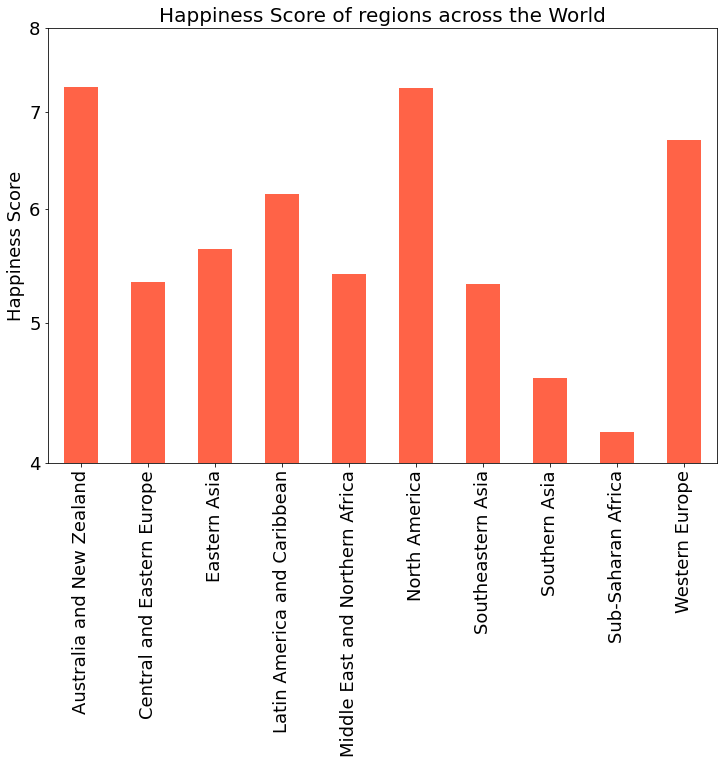

In [50]:
groupmean["Happiness Score"].plot(kind = "bar", figsize = (12,8), fontsize = 18, color='tomato')
plt.yscale("log")
plt.yticks(np.arange(4,9,1),np.arange(4,9,1))
plt.ylabel("Happiness Score", fontsize=18)
plt.xlabel("")
plt.title("Happiness Score of regions across the World",fontsize=20)
plt.show()

In [51]:
groupmean1 = dfhap.groupby("Region",as_index = False).agg(np.mean)
groupmean1

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
1,Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
2,Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
3,Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
4,Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
5,North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
6,Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
7,Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
8,Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980
9,Western Europe,29.523810,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185


This has derived the same results, but there is a slightly different organization.

In [54]:
# groupreg.hist(column = "Happiness Score", rwidth = 0.8)
# plt.show()

In [55]:
### Different function can be applied to different columns by passing a dictionary in .agg
groupreg.agg({'Happiness Score':np.mean,'Family':np.median})

,Happiness Score,Family
Region,,
Australia and New Zealand,7.285000,1.314450
Central and Eastern Europe,5.332931,1.106140
Eastern Asia,5.626167,1.067175
Latin America and Caribbean,6.144682,1.146430
Middle East and Northern Africa,5.406900,1.000120
North America,7.273000,1.284860
Southeastern Asia,5.317444,1.020000
Southern Asia,4.580857,0.431060
Sub-Saharan Africa,4.202800,0.878375


/Users/siddharth/anaconda3/envs/datascience/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


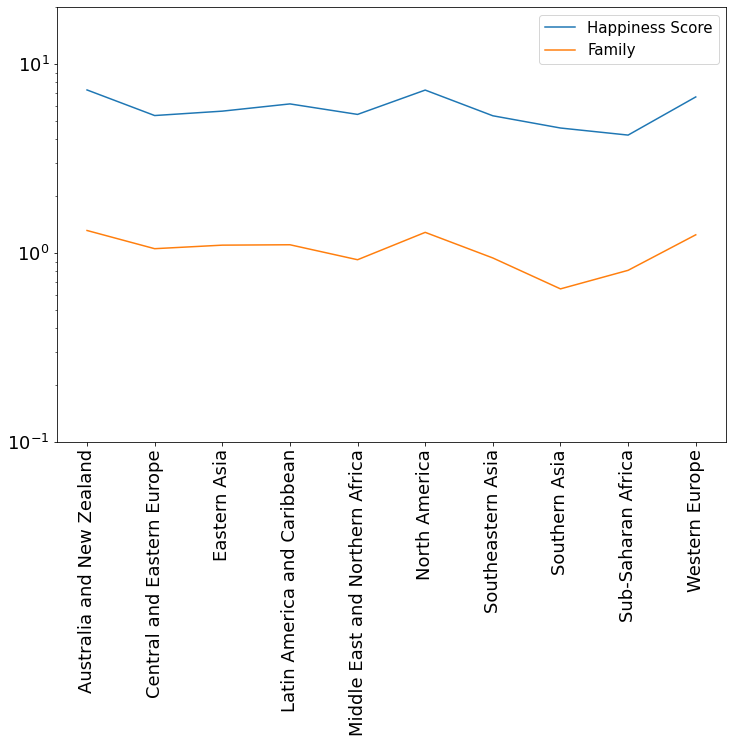

In [92]:
regs = list(groupreg.groups.keys())
groupreg.agg({'Happiness Score':np.mean,'Family':np.mean}).plot(kind  = 'line', figsize = (12,8),fontsize = 18)
plt.yscale("log")
plt.xlabel("")
plt.ylim(0.1,20)
plt.xticks(np.arange(0,len(regs),1),regs,rotation='90')
plt.legend(fontsize=15)

### The above plot shows that Happiness Score and Family has a positive correlation.

In [93]:
### Aggregation can also be performed on specific columns using the [] operator on the GroupBy object. 
groupreg["Family"].mean()

Region
Australia and New Zealand          1.314450
Central and Eastern Europe         1.053042
Eastern Asia                       1.099427
Latin America and Caribbean        1.104720
Middle East and Northern Africa    0.920490
North America                      1.284860
Southeastern Asia                  0.940468
Southern Asia                      0.645321
Sub-Saharan Africa                 0.809085
Western Europe                     1.247302
Name: Family, dtype: float64

### Filter

In [94]:
### Showing only those groups whose mean Happiness Score is above 6.5
groupreg.filter(lambda x:x["Happiness Score"].mean()>6.5)

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
